# Setup

In [104]:
import sqlite3
import pandas as pd
import datetime
from wordcloud import WordCloud, STOPWORDS 
import sys
from os import path
import numpy as np
from PIL import Image
from textblob import TextBlob
import nltk
import re
import matplotlib
import matplotlib.pyplot as plt

# Grab text messages

### Grab your iMessages courtesy of https://stmorse.github.io/journal/iMessage.html 

In [2]:
# path to message db
conn = sqlite3.connect('/Users/wbr/Library/Messages/chat.db')
c = conn.cursor()

In [3]:
# grab the messages from chat id 194, which is my the id for my Family group chat
# 198 is Katie chat
cmd1 = 'SELECT ROWID, text, handle_id, \
            datetime(date + strftime(\'%s\',\'2001-01-01\'), \'unixepoch\') as date_utc \
            FROM message T1 \
            INNER JOIN chat_message_join T2 \
                ON T2.chat_id=198 \
                AND T1.ROWID=T2.message_id \
            ORDER BY T1.date'
c.execute(cmd1)
df_msg = pd.DataFrame(c.fetchall(), columns=['id', 'text', 'sender', 'time'])

In [4]:
len(df_msg)

50051

# Make a wordcloud 

### wordcloud source https://github.com/nikhilkumarsingh/wordcloud-example/blob/master/mywc.py

In [5]:
# get path to directory
currdir = '/Users/WBR/walter/python_psc290/hw'


In [6]:
# mask = np.array(Image.open(path.join(currdir, "cloud.png")))


In [7]:
# cat_words = df_msg.text.str.cat(sep=',')
cat_words = df_msg.text.to_string
# print(cat_words)


In [8]:
df2 = df_msg

In [9]:
# ' '.join(df_msg['text'])
# doesnt work because there are blank cells.
# gonna fix this by replacing blanks with nan then dropping nan
df2['text'].replace('', np.nan, inplace=True)
df2.dropna(subset=['text'], inplace=True)
# now conc everything the right way
conc_messages = ' '.join(df2['text'])


In [77]:
df2.head()

,id,text,sender,time
0,18007,Only 1 mile to go! I had a really nice night w...,200,2015-12-12 14:46:34
1,18018,Hi hi :) finally done with the longest day eve...,200,2015-12-12 20:58:45
2,18020,Aw I'm sure you're exhausted. I hope you have ...,200,2015-12-12 21:47:30
3,18025,I did finally get my nap in! That sounds like ...,200,2015-12-12 23:23:15
4,18026,Good! Recovered enough to study? I've been cli...,200,2015-12-13 00:15:40


In [78]:
# make a df containing only texts that include the word 'love'
df_love = df2[df2['text'].str.contains('love')]

In [89]:
# plot a historgram of months when love was mentioned
df_love["time"] = df_love["time"].astype("datetime64")

/Users/WBR/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)
/Users/WBR/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

NameError: name 'legend' is not defined

/Users/WBR/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


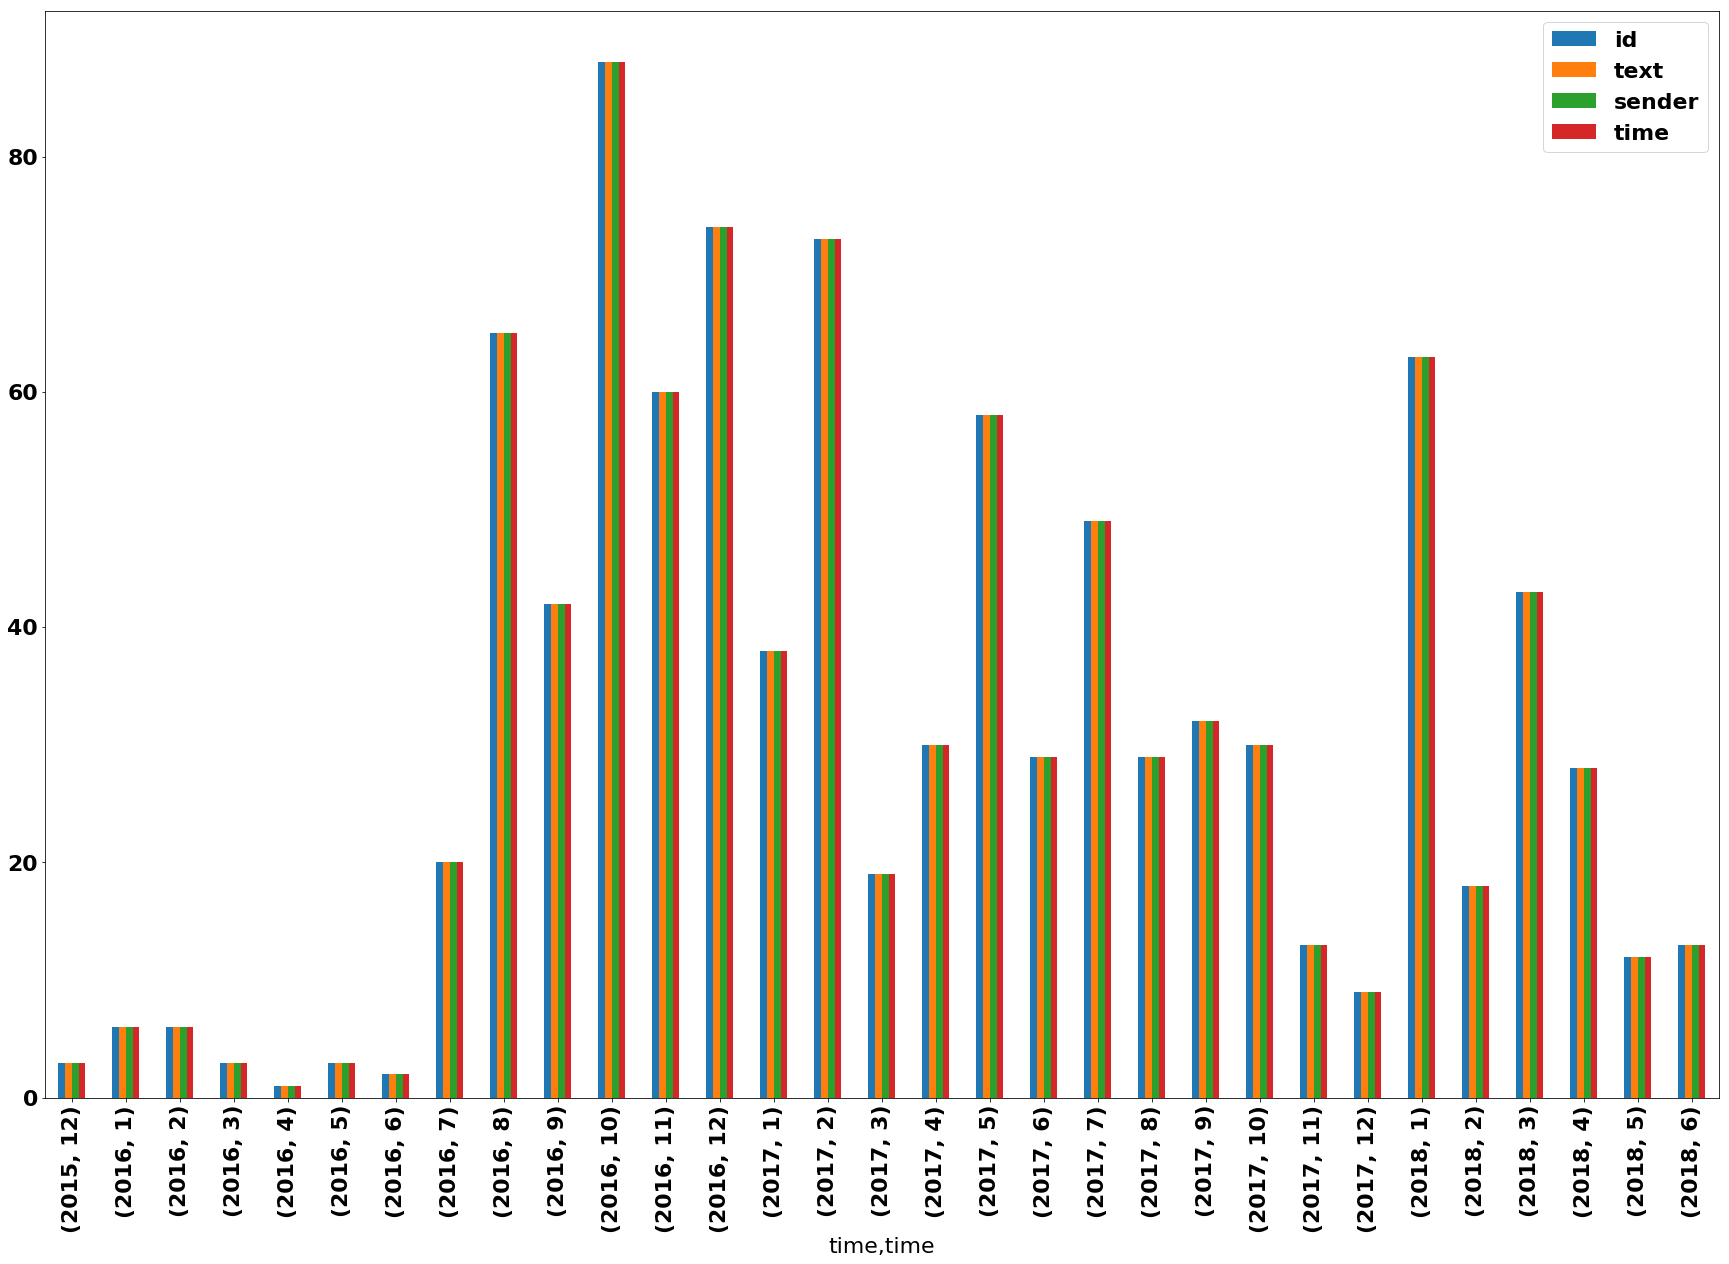

In [120]:
# %matplotlib inline

df_love.groupby([df_love["time"].dt.year, df_love["time"].dt.month]).count().plot(kind="bar")      
legend.remove()
plt.rcParams['figure.figsize'] = [30, 20]
plt.show()

In [11]:
# def get_wiki(query):
#     # get best matching title for given query
#     title = wikipedia.search(query)[0]

#     # get wikipedia page for selected title
#     page = wikipedia.page(title)
#     return page.content


def create_wordcloud(text):
    # create numpy array for wordcloud mask image
    mask = np.array(Image.open(path.join(currdir, "cloud.png")))

    # create set of stopwords	
    stopwords = set(STOPWORDS)

    # create wordcloud object
    wc = WordCloud(background_color="white",
                    max_words=150, 
                    mask=mask,
                    stopwords=stopwords)

    # generate wordcloud
#     wc.generate(text)
    wc.generate_from_text(text)
    # save wordcloud
    wc.to_file(path.join(currdir, "wc.png"))

In [12]:
create_wordcloud(conc_messages)

# Trying textblob

In [13]:
# create a textblob object
da_words = TextBlob(conc_messages)
# tag the POS
tagged = da_words.tags

In [25]:
# get a list of the verbs from the textblob object 
verbs_from_texts =  [t[0] for t in tagged if t[1] == 'VB']

In [49]:
# Now I want to put the verbs and their counts in a pandas df 
# da_words.word_counts
# df[~df['stn'].isin(remove_list)]
items = da_words.word_counts.items()
df_wordcounts = pd.DataFrame(list(items),columns=['word','count'])
# columns=['Word', 'Count']
# [d['value'] for d in l if 'value' in d]


In [61]:
# woohoo that was difficult
len(df_wordcounts)

18309

In [67]:
# now create df with just the verbs
df_verbs =  df_wordcounts[df_wordcounts['word'].isin(verbs_from_texts)]

In [70]:
df_verbs.head()

,word,count
4,go,1722
5,i,16849
16,hope,340
17,see,785
19,hi,103


In [60]:
df_verbs.sort_values('count',ascending=False)

,word,count
5,i,16849
161,’,7885
64,that,4633
56,s,4589
92,so,3983
66,like,3150
41,have,2939
68,be,2876
205,t,2392
37,m,2391


In [71]:
'hi' in verbs_from_texts

True